In [2]:
# Importing filterwarnings to ignore warning messages

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Step 1: Reading and Understanding the Data

In [4]:
#read the dataset

df = pd.read_csv("D:/Bike/day.csv")
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
df.shape

(730, 16)

In [6]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

##### There are no missing values in the dataset

In [7]:
emptycol=df.isnull().sum()
emptycol=emptycol[emptycol.values>(0.5*len(emptycol))]
len(emptycol)

0

In [8]:
# dropping instant column as it is index, dteday and we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered

df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace= True)


In [9]:
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

### Step 2: Visualising the Data

#### from data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
#### We will replace season,weekday and weathersit with appropriate values

In [10]:
#replacing season column

df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.head(10)

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0     1        0        1           1           2  14.110847   
1  spring   0     1        0        2           1           2  14.902598   
2  spring   0     1        0        3           1           1   8.050924   
3  spring   0     1        0        4           1           1   8.200000   
4  spring   0     1        0        5           1           1   9.305237   
5  spring   0     1        0        6           0           1   8.378268   
6  spring   0     1        0        0           0           2   8.057402   
7  spring   0     1        0        1           1           2   6.765000   
8  spring   0     1        0        2           1           1   5.671653   
9  spring   0     1        0        3           1           1   6.184153   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  
5  11.66045  51.8261   6.000868  1606  
6  10.44195  49.8696  11.304642  1510  
7   8.11270  53.5833  17.875868   959  
8   5.80875  43.4167  24.250650   822  
9   7.54440  48.2917  14.958889  1321

In [11]:
#replacing weathersit

df['weathersit'].replace({1:"Clear",2:"Mist",3:"Light snow",4:"Heavy Rain"},inplace=True)
df.head()

season  yr  mnth  holiday  weekday  workingday weathersit       temp  \
0  spring   0     1        0        1           1       Mist  14.110847   
1  spring   0     1        0        2           1       Mist  14.902598   
2  spring   0     1        0        3           1      Clear   8.050924   
3  spring   0     1        0        4           1      Clear   8.200000   
4  spring   0     1        0        5           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [12]:
#replacing weekday

df['weekday'].replace({1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday",0:"Sunday"},inplace=True)
df.head(10)

season  yr  mnth  holiday    weekday  workingday weathersit       temp  \
0  spring   0     1        0     Monday           1       Mist  14.110847   
1  spring   0     1        0    Tuesday           1       Mist  14.902598   
2  spring   0     1        0  Wednesday           1      Clear   8.050924   
3  spring   0     1        0   Thursday           1      Clear   8.200000   
4  spring   0     1        0     Friday           1      Clear   9.305237   
5  spring   0     1        0   Saturday           0      Clear   8.378268   
6  spring   0     1        0     Sunday           0       Mist   8.057402   
7  spring   0     1        0     Monday           1       Mist   6.765000   
8  spring   0     1        0    Tuesday           1      Clear   5.671653   
9  spring   0     1        0  Wednesday           1      Clear   6.184153   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  
5  11.66045  51.8261   6.000868  1606  
6  10.44195  49.8696  11.304642  1510  
7   8.11270  53.5833  17.875868   959  
8   5.80875  43.4167  24.250650   822  
9   7.54440  48.2917  14.958889  1321

In [13]:
#replacing mnth

df['mnth'].replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace=True)
df.head(10)

season  yr mnth  holiday    weekday  workingday weathersit       temp  \
0  spring   0  Jan        0     Monday           1       Mist  14.110847   
1  spring   0  Jan        0    Tuesday           1       Mist  14.902598   
2  spring   0  Jan        0  Wednesday           1      Clear   8.050924   
3  spring   0  Jan        0   Thursday           1      Clear   8.200000   
4  spring   0  Jan        0     Friday           1      Clear   9.305237   
5  spring   0  Jan        0   Saturday           0      Clear   8.378268   
6  spring   0  Jan        0     Sunday           0       Mist   8.057402   
7  spring   0  Jan        0     Monday           1       Mist   6.765000   
8  spring   0  Jan        0    Tuesday           1      Clear   5.671653   
9  spring   0  Jan        0  Wednesday           1      Clear   6.184153   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  
5  11.66045  51.8261   6.000868  1606  
6  10.44195  49.8696  11.304642  1510  
7   8.11270  53.5833  17.875868   959  
8   5.80875  43.4167  24.250650   822  
9   7.54440  48.2917  14.958889  1321

In [14]:
df.shape

(730, 12)

In [15]:
#changing datatypes of numerical columns to appropriate types

df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Visualising Numeric Variables
#### Let's make a pairplot of all the numeric variables

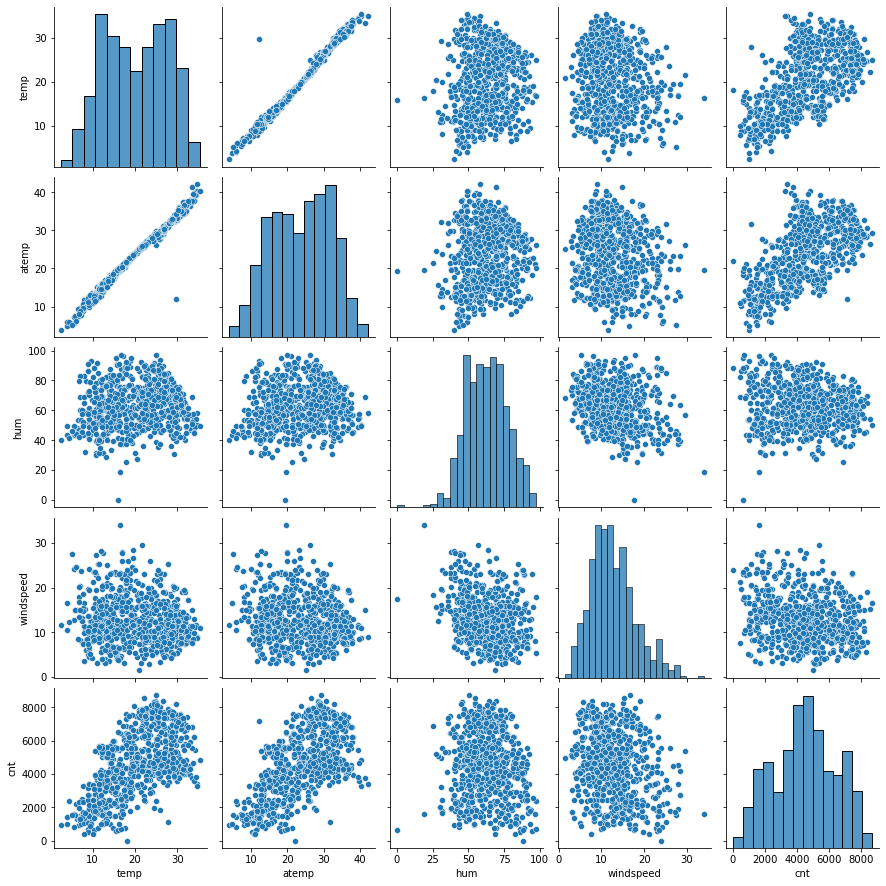

In [17]:
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

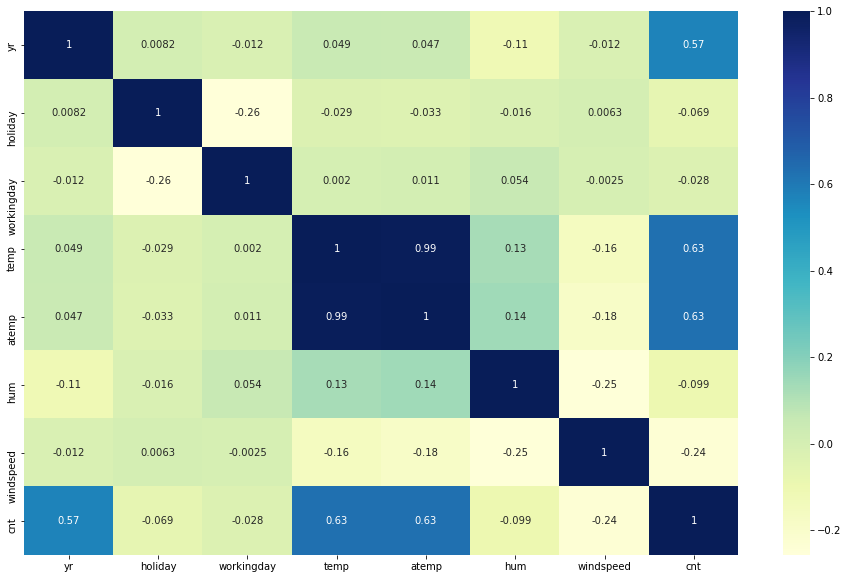

In [18]:
#check the correlation

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

###### From the above graph and heatmap we can say that temp and atemp have high correlation as 0.99 which is almost equal to 1.
###### So we need drop one to avoid multicollinearity

In [19]:
df.drop(['atemp'],axis=1,inplace=True)
df.head()

season  yr mnth  holiday    weekday  workingday weathersit       temp  \
0  spring   0  Jan        0     Monday           1       Mist  14.110847   
1  spring   0  Jan        0    Tuesday           1       Mist  14.902598   
2  spring   0  Jan        0  Wednesday           1      Clear   8.050924   
3  spring   0  Jan        0   Thursday           1      Clear   8.200000   
4  spring   0  Jan        0     Friday           1      Clear   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

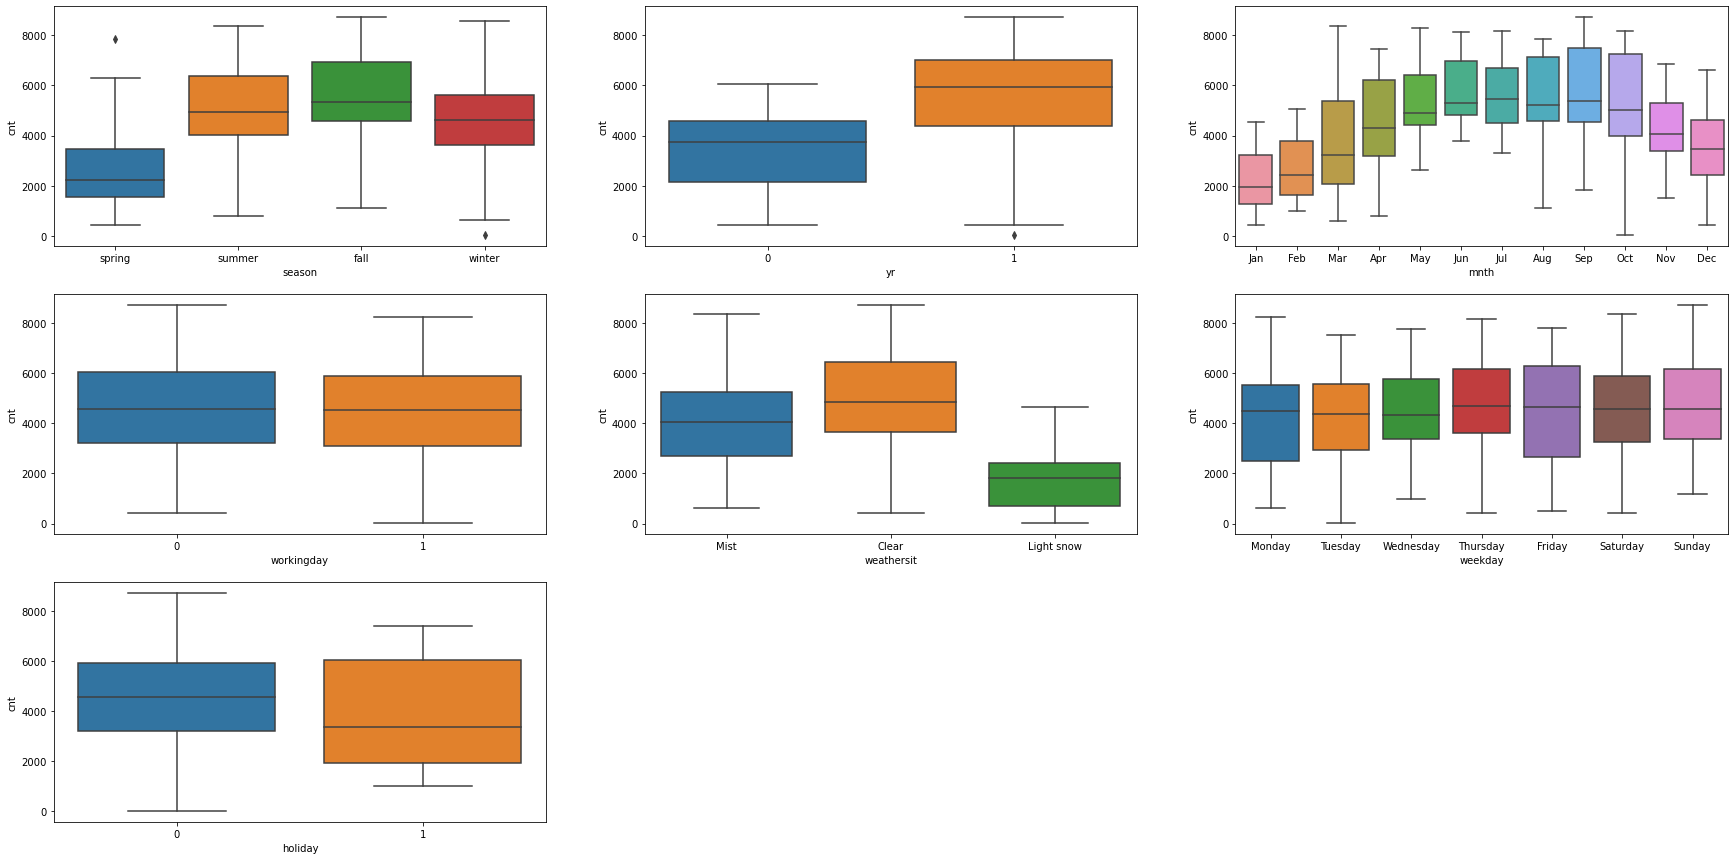

In [20]:
# visualizing categorical variables

plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df) #yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

### Step 4 : Creating Dummy Variables


In [21]:
#creating dummy variables for categorical data

Season_condition = pd.get_dummies(df['season'],drop_first=True)
Weather_condition = pd.get_dummies(df['weathersit'],drop_first=True)
Day_of_week = pd.get_dummies(df['weekday'],drop_first=True)
Month = pd.get_dummies(df['mnth'],drop_first=True)

In [22]:
df = pd.concat([df,Season_condition],axis=1)
df = pd.concat([df,Weather_condition],axis=1)
df = pd.concat([df,Day_of_week],axis=1)
df = pd.concat([df,Month],axis=1)

In [23]:
# Dropping the categorical variables as they are already dummy-encoded.

df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)
df.drop(['weekday'],axis=1,inplace=True)
df.drop(['mnth'],axis=1,inplace=True)

In [24]:
df.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
0   0        0           1  14.110847  80.5833  10.749882   985       1   
1   0        0           1  14.902598  69.6087  16.652113   801       1   
2   0        0           1   8.050924  43.7273  16.636703  1349       1   
3   0        0           1   8.200000  59.0435  10.739832  1562       1   
4   0        0           1   9.305237  43.6957  12.522300  1600       1   

   summer  winter  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
0       0       0  ...    0    0    1    0    0    0    0    0    0    0  
1       0       0  ...    0    0    1    0    0    0    0    0    0    0  
2       0       0  ...    0    0    1    0    0    0    0    0    0    0  
3       0       0  ...    0    0    1    0    0    0    0    0    0    0  
4       0       0  ...    0    0    1    0    0    0    0    0    0    0  

[5 rows x 29 columns]

### Step 5: Splitting the Data into Training and Testing Sets

In [25]:
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
df_test.shape

(219, 29)

In [27]:
df_train.shape

(510, 29)

###### Rescaling the feature


In [28]:
scaler = MinMaxScaler()

In [29]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars=['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [30]:
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  spring  \
653   1        0           1  0.509887  0.575354   0.300794  0.864243       0   
576   1        0           1  0.815169  0.725633   0.264686  0.827658       0   
426   1        0           0  0.442393  0.640189   0.255342  0.465255       1   
728   1        0           1  0.245101  0.498067   0.663106  0.204096       1   
482   1        0           0  0.395666  0.504508   0.188475  0.482973       0   

     summer  winter  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
653       0       1  ...    0    0    0    0    0    0    0    0    1    0  
576       0       0  ...    0    0    0    1    0    0    0    0    0    0  
426       0       0  ...    0    0    0    0    0    1    0    0    0    0  
728       0       0  ...    1    0    0    0    0    0    0    0    0    0  
482       1       0  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 29 columns]

In [31]:
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.650369    0.320768   
std      0.500429    0.157763    0.453386    0.225844    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.540519    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer     winter  ...         Dec  \
count  510.000000  510.000000  510.000000  510.00000  ...  510.000000   
mean     0.513620    0.243137    0.245098    0.24902  ...    0.084314   
std      0.224593    0.429398    0.430568    0.43287  ...    0.278131   
min      0.000000    0.000000    0.000000    0.00000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.00000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.00000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.00000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.00000  ...    1.000000   

              Feb         Jan         Jul         Jun         Mar         May  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.066667    0.088235    0.076471    0.074510    0.098039    0.084314   
std      0.249689    0.283915    0.266010    0.262857    0.297660    0.278131   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Nov         Oct         Sep  
count  510.000000  510.000000  510.000000  
mean     0.086275    0.086275    0.080392  
std      0.281045    0.281045    0.272166  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

##### Dividing into X and Y sets for the model building


In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

In [33]:
X_train.head()

yr  holiday  workingday      temp       hum  windspeed  spring  summer  \
653   1        0           1  0.509887  0.575354   0.300794       0       0   
576   1        0           1  0.815169  0.725633   0.264686       0       0   
426   1        0           0  0.442393  0.640189   0.255342       1       0   
728   1        0           1  0.245101  0.498067   0.663106       1       0   
482   1        0           0  0.395666  0.504508   0.188475       0       1   

     winter  Light snow  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
653       1           0  ...    0    0    0    0    0    0    0    0    1    0  
576       0           0  ...    0    0    0    1    0    0    0    0    0    0  
426       0           0  ...    0    0    0    0    0    1    0    0    0    0  
728       0           0  ...    1    0    0    0    0    0    0    0    0    0  
482       0           0  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 28 columns]

In [34]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### Step 6: Building a linear model


##### Using Recursive feature elimination(RFE)

In [35]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light snow', True, 1),
 ('Mist', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light snow', 'Mist', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct'],
      dtype='object')

In [39]:
X_train_rfe = X_train[col]

##### Building model using statsmodel

In [40]:
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [41]:
# Running the linear model

lm = sm.OLS(y_train,X_train_rfe1).fit()

In [42]:
#Let's see the summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          3.34e-189
Time:                        19:38:41   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

##### Variance Inflation Factor(VIF)

In [43]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3          hum  30.94
2         temp  17.80
4    windspeed   4.72
5       spring   4.37
7       winter   4.06
6       summer   2.81
9         Mist   2.32
0           yr   2.09
13         Nov   1.83
11         Jan   1.75
12         Jul   1.59
10         Dec   1.55
14         Sep   1.41
8   Light snow   1.28
1      holiday   1.06

In [44]:
#DEC has high p-value so dropping it

X_train_rfe=X_train_rfe.drop(['Dec'],axis=1)

In [45]:
#create another model

X_train_rfe2 = sm.add_constant(X_train_rfe)

#create first model and fit
lm1 = sm.OLS(y_train,X_train_rfe2).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.25e-189
Time:                        19:40:39   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.035      8.597      0.0

In [46]:
# Again check for VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3          hum  29.12
2         temp  16.80
4    windspeed   4.71
5       spring   4.37
7       winter   3.78
6       summer   2.79
9         Mist   2.29
0           yr   2.09
10         Jan   1.67
11         Jul   1.59
12         Nov   1.59
13         Sep   1.40
8   Light snow   1.25
1      holiday   1.06

In [47]:
#Nov HAS A VERY HIGH P-value SO WE DROP IT

X_train_rfe=X_train_rfe.drop(['Nov'],axis=1)

In [48]:
#create another model

X_train_rfe3 = sm.add_constant(X_train_rfe)

#create first model and fit

lm2 = sm.OLS(y_train,X_train_rfe3).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.45e-190
Time:                        19:40:52   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2957      0.035      8.466      0.0

In [49]:
#Check for VIF again

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3          hum  29.05
2         temp  16.70
4    windspeed   4.66
5       spring   4.34
7       winter   3.38
6       summer   2.78
9         Mist   2.28
0           yr   2.09
10         Jan   1.67
11         Jul   1.59
12         Sep   1.38
8   Light snow   1.24
1      holiday   1.04

In [50]:
#Jan has high p-value so we drop it

X_train_rfe=X_train_rfe.drop(['Jan'],axis=1)

In [51]:
# create another model

X_train_rfe4 = sm.add_constant(X_train_rfe)

#create first model and fit

lm3 = sm.OLS(y_train,X_train_rfe4).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.69e-190
Time:                        19:42:14   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.0

In [52]:
#Checking for VIF again

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3          hum  28.06
2         temp  16.02
4    windspeed   4.65
5       spring   4.01
7       winter   3.35
6       summer   2.78
9         Mist   2.28
0           yr   2.08
10         Jul   1.58
11         Sep   1.38
8   Light snow   1.24
1      holiday   1.04

In [53]:
#Hum has high VIF and p-value so dropping it

X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [54]:
#create another model

X_train_rfe5 = sm.add_constant(X_train_rfe)

#create first model and fit

lm4 = sm.OLS(y_train,X_train_rfe5).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.40e-187
Time:                        19:42:45   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

In [55]:
#Checking for VIF again

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2         temp  5.09
3    windspeed  4.60
5       summer  2.21
4       spring  2.08
0           yr  2.07
6       winter  1.79
9          Jul  1.58
8         Mist  1.55
10         Sep  1.34
7   Light snow  1.08
1      holiday  1.04

In [56]:
#windspeed has high VIF  so dropping it

X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [57]:
#create another model

X_train_rfe6 = sm.add_constant(X_train_rfe)

#create first model and fit

lm5 = sm.OLS(y_train,X_train_rfe6).fit()

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.80e-181
Time:                        19:43:20   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1503      0.029      5.134      0.0

In [58]:
#Checking for VIF again

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2        temp  4.22
0          yr  2.06
4      summer  1.93
5      winter  1.58
8         Jul  1.58
7        Mist  1.55
3      spring  1.40
9         Sep  1.34
6  Light snow  1.07
1     holiday  1.04

In [59]:
#summer has high p-value  so dropping it

X_train_rfe=X_train_rfe.drop(['summer'],axis=1)

In [60]:
#create another model

X_train_rfe7 = sm.add_constant(X_train_rfe)

#create first model and fit

lm6 = sm.OLS(y_train,X_train_rfe7).fit()

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.16e-181
Time:                        19:43:38   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1938      0.022      8.750      0.0

In [61]:
#Checking for VIF again

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2        temp  2.99
0          yr  2.05
6        Mist  1.51
4      winter  1.33
7         Jul  1.33
3      spring  1.25
8         Sep  1.19
5  Light snow  1.06
1     holiday  1.04

All the values are having low p-value and low VIF so we can consider lm6 model

### Step 7: Residual Analysis of the train data


In [62]:
#Predict values

y_train_cnt = lm6.predict(X_train_rfe7)

In [63]:
#Calculating residuals

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

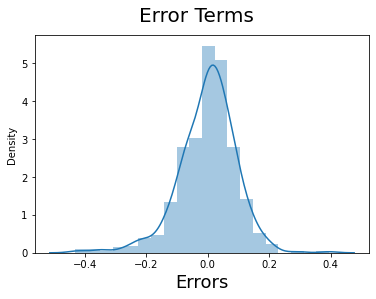

In [64]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [65]:
#Checking columns
X_train_rfe7.columns

Index(['const', 'yr', 'holiday', 'temp', 'spring', 'winter', 'Light snow',
       'Mist', 'Jul', 'Sep'],
      dtype='object')

In [66]:
print(X_train_rfe7.shape)
print(res.shape)

(510, 10)
(510,)


### Step 8: Making Predictions


In [68]:
#Scaling the test data

num_vars=['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [69]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [70]:
X_train_new=X_train_rfe7.drop(['const'], axis=1)

In [71]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [72]:
X_train_rfe7.columns

Index(['const', 'yr', 'holiday', 'temp', 'spring', 'winter', 'Light snow',
       'Mist', 'Jul', 'Sep'],
      dtype='object')

In [73]:
#Making predictions on the chosen model

y_pred = lm6.predict(X_test_new)

### Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

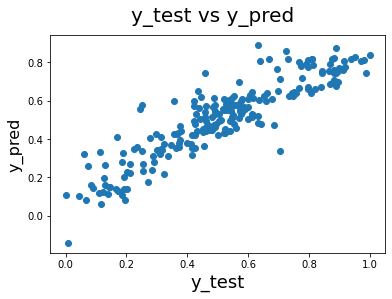

In [74]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

##### We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [75]:
#Returns the mean squared error; we'll take a square root

np.sqrt(mean_squared_error(y_test, y_pred))

0.10510537504333055

In [76]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.805228096430141

In [77]:
n = X_test_new.shape[0]
p = X_test_new.shape[1]

# Calculating Adjusted R-squared value using the formula

adjusted_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)
adjusted_r2

0.7958640626046671

#### R square of our model is 0.805
#### Adj R square is 0.795 

In [78]:
X_train_new.head()

yr  holiday      temp  spring  winter  Light snow  Mist  Jul  Sep
653   1        0  0.509887       0       1           0     0    0    0
576   1        0  0.815169       0       0           0     0    1    0
426   1        0  0.442393       1       0           0     1    0    0
728   1        0  0.245101       1       0           0     0    0    0
482   1        0  0.395666       0       0           0     1    0    0

In [79]:
print(X_train_rfe7.columns)
print(lm6.summary())

Index(['const', 'yr', 'holiday', 'temp', 'spring', 'winter', 'Light snow',
       'Mist', 'Jul', 'Sep'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.16e-181
Time:                        19:46:02   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----

#### Train R^2: 0.823
#### Train Adj R^2: 0.819
#### Test R^2: 0.805
#### Test Adj R^2: 0.795

### We can see that the equation for best fitted line is:
### cnt= 0.233 X yr - 0.101 X holiday + 0.471 X temp - 0.110 X spring +0.055 X winter -0.300 X Light snow - 0.079 X Mist - 0.068 X Jul + 0.065 X Sep 

### We can see the demand for bikes depends mainly on below variables:
##### yr , holiday, temp, spring, winter, Light snow, Mist, July, Sep

#### The three most significant variables affecting the demand for shared bikes are :
#### temp
#### year
#### season winter
as these features are having positive coefficients and an increase in them is going to result into an increase in the demand for shared bikes.

##### Demand decreases if it is holiday , Spring, Light snow, Jul and Mist